In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
# To generate a random n-class classification problem

# Returns :
# X : array of shape [n_samples, n_features]

# The generated samples.

# y : array of shape [n_samples]

# The integer labels for class membership of each sample.

X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
# X - Feature Vector with 50000 data-points and 15-features
# y - Class Label with 50000 class labels

X.shape, y.shape

((50000, 15), (50000,))

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Split arrays or matrices into random train and test subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [7]:
from sklearn import linear_model

In [8]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [9]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.07 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.08 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.09 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [10]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

In [11]:
# Split arrays or matrices into random train and test subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

- Initialize the weight_vector and intercept term randomly

In [13]:
w = np.zeros_like(X_train[0])
b = 0
eta0  = 0.0001# learning rate r
alpha = 0.0001 # lambda

N = len(X_train)

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

In [14]:
def predict(w, X, b):
    N = len(X)    
    predict = []
    for i in range(N):
        if sigmoid(w, X[i], b) >= 0.5:
            predict.append(1)
        else:
            predict.append(0)
            
    return np.array(predict)

def sigmoid(w, x, b):
     return 1 / (1 + np.exp(-(np.dot(w.transpose(), x) + b)))
    
def sigmoid_predict(w, X, b):
    pred_proba = []
    for x in X:
        pred_proba.append(sigmoid(w, x, b))
        
    return np.array(pred_proba)
    
def log_loss(actual_labels, predicted_labels):
    loss = 0
    
    for l in zip(actual_labels, predicted_labels):
        loss += (l[0] * np.log10(l[1])) + ( (1-l[0]) * np.log10(1-l[1]))
        
    return (-1) * loss / len(actual_labels)
    

In [15]:
print("Initial train loss:" ,log_loss(y_train,sigmoid_predict(w,X_train,b))," at W:",w,"  and b :",b)

print("Initial test loss:" ,log_loss(y_test,sigmoid_predict(w,X_test,b))," at W:",w,"  and b :",b)

Initial train loss: 0.3010299956640568  at W: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   and b : 0
Initial test loss: 0.30102999566403754  at W: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   and b : 0


- For each epoch:
    - For each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


In [16]:
import random

train_loss, test_loss = [], []
for epoch in range(15):
    for i in range(N):
        batch = random.randrange(0,N)
        
        w = ( (1 - ((alpha * eta0)/N)) * w ) +\
            ( alpha * X_train[batch] * ( y_train[batch] - sigmoid(w, X_train[batch], b) ) ) 
            
        b = b + ( alpha * (y_train[batch] - sigmoid(w, X_train[batch], b)))
        
        
    # Predicting y-values for X_train
    y_train_pred = sigmoid_predict(w, X_train, b)
                       
    # Calculating log-loss for training data and appending it into a list "train_loss"
    loss_1 = log_loss(y_train, y_train_pred)
    train_loss.append(loss_1)
                      
    # Predicting y-values for X_test
    y_test_pred = sigmoid_predict(w, X_test, b)
                       
    # Calculating log-loss for training data and appending it into a list "train_loss"
    loss_2 = log_loss(y_test, y_test_pred)
    test_loss.append(loss_2)
    
    print(f"-- Epoch {epoch+1}   --  train_loss: {loss_1};    test_loss: {loss_2}")
    

-- Epoch 1   --  train_loss: 0.17565402515900835;    test_loss: 0.17601233078953482
-- Epoch 2   --  train_loss: 0.16892169213685965;    test_loss: 0.16976534623791242
-- Epoch 3   --  train_loss: 0.16658385705051015;    test_loss: 0.16735232927834295
-- Epoch 4   --  train_loss: 0.16542409634025632;    test_loss: 0.16635419787498285
-- Epoch 5   --  train_loss: 0.16490801606708083;    test_loss: 0.16576301547972624
-- Epoch 6   --  train_loss: 0.16473548060074578;    test_loss: 0.16581900839843475
-- Epoch 7   --  train_loss: 0.16443630837458023;    test_loss: 0.1653413669824474
-- Epoch 8   --  train_loss: 0.16435448267973413;    test_loss: 0.16520646452972726
-- Epoch 9   --  train_loss: 0.16446736577612203;    test_loss: 0.16530588283764436
-- Epoch 10   --  train_loss: 0.1644234032650365;    test_loss: 0.16529476963852677
-- Epoch 11   --  train_loss: 0.16436139428660498;    test_loss: 0.165332956954051
-- Epoch 12   --  train_loss: 0.16440776298813917;    test_loss: 0.16529535763

- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

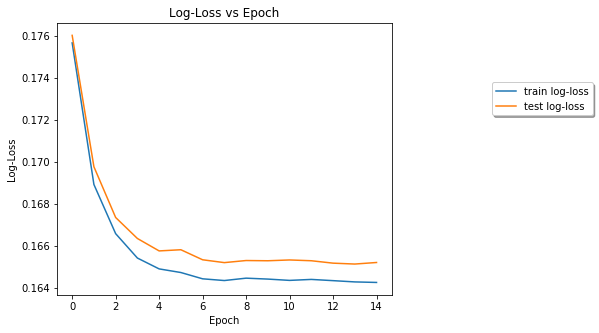

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
ax = plt.subplot(111)
plt.xlabel("Epoch")
plt.ylabel("Log-Loss")
plt.title("Log-Loss vs Epoch")
plt.plot(train_loss, label="train log-loss")
plt.plot(test_loss, label="test log-loss")
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

 <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [18]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
abs(w-clf.coef_), abs(b-clf.intercept_)

(array([[0.00511764, 0.00150307, 0.00374616, 0.00617012, 0.01044384,
         0.01480045, 0.00313862, 0.00750824, 0.01182191, 0.00171686,
         0.00589279, 0.00679959, 0.0102015 , 0.00505416, 0.00504544]]),
 array([0.04131161]))

In [19]:
print("Train Accuracy: ", 1-abs(np.sum(y_train - sigmoid_predict(w, X_train, b))/len(X_train)))
print("Test Accuracy: ", 1-abs(np.sum(y_test  - sigmoid_predict(w, X_test, b))/len(X_test)))

Train Accuracy:  0.9998341005651247
Test Accuracy:  0.9990752791371706
